# Enjoy all the commentary!

In [52]:
# %tensorflow_version 2.x
%matplotlib inline
import matplotlib.pyplot as plt

import glob, os
import numpy as np
import pandas as pd
from PIL import Image

# from IPython.display import Image

import sys

# from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
# from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
# from tensorflow.keras.layers import UpSampling2D, Conv2D, LeakyReLU
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow import test
# from tensorflow import device

# from keras.utils import plot_model

For this project, I found a dataset with [61000 mugshots from Illinois](https://www.kaggle.com/davidjfisher/illinois-doc-labeled-faces-dataset?select=person.csv), and I decided to run a GAN on it to generate mugshots. It thought this would be quite straightforward but as I will get a chance to show you, it was not. To start off, I had to standardize the mugshots so I did this like in the dogs and cats CNN assignment. I did this locally, with the model training on Colab.

In [61]:
images_dir = "training_images"
img_rows = 64
img_cols = 64
channels = 1
img_shape = (img_rows, img_cols, channels)

size = 64, 64

noise_len = 100

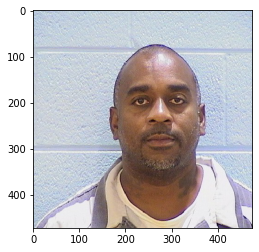

In [63]:
# https://www.kaggle.com/davidjfisher/illinois-doc-labeled-faces-dataset
# https://www.kaggle.com/elliotp/sample-data-loader
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/Mugshots/front/front/{}.jpg".format(labels['id'][1000]))
plt.imshow(im1)

This was one photo in the mugshot set which I decided to process as an example. First I made it square, then I resized it to 64x64, and then I converted it to grayscale. The size I chose was a balance I found to minimize the size but still retain the detail in the faces.

In [64]:
width, height = im1.size
if width < height:
    new_width = width
    new_height = width
else:
    new_width = height
    new_height = height


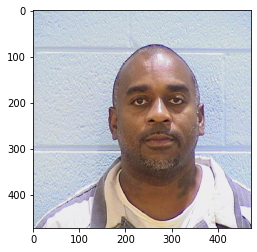

In [65]:
left = round((width - new_width)/2)
top = round((height - new_height)/2)
x_right = round(width - new_width) - left
x_bottom = round(height - new_height) - top
right = width - x_right
bottom = height - x_bottom

im1 = im1.crop((left, top, right, bottom))
plt.imshow(im1)

(64, 64)


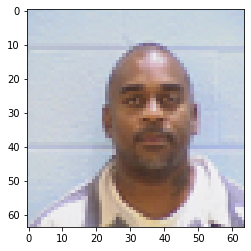

In [66]:
im1 = im1.resize(size)
print(im1.size)
plt.imshow(im1)

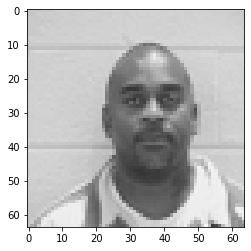

In [67]:
plt.imshow(im1.convert('LA'))

Here I ran the resizing on all the front facing and side facing images in the mugshot set. The squaring actually had no effect because all the images were already square. Notably, the front folder went from 3.23 GB to 95.7 MB. Here you'll notice that the side images generated a lot of errors. I found out that the side photos that generated errors because they were corrupted were paired with blank front facing photos. In the following cell I took this list of errors and deleted all the front facing photos with the same names.

In [55]:
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/*.jpg"):
    try:
        with Image.open(infile) as im:
            im = im.convert('RGB')
            width, height = im.size
            if width < height:
                new_width = width
                new_height = width
            else:
                new_width = height
                new_height = height

            left = round((width - new_width)/2)
            top = round((height - new_height)/2)
            x_right = round(width - new_width) - left
            x_bottom = round(height - new_height) - top
            right = width - x_right
            bottom = height - x_bottom

            im = im.crop((left, top, right, bottom))
            im = im.resize(size)
            im.save(infile)
    except:
        print('error', infile)

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16000.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70391.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78915.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78901.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52862.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B21271.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76723.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S15318.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N32653.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20559.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77824.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X62597.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77199.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R56791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25185.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78296.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A86277.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M33737.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77628.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S00514.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29026.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K64385.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S12886.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77947.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78490.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C61096.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78640.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B66909.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S11018.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76136.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70221.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R64486.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68334.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77214.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78127.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78899.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78641.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78655.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N33207.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M49275.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B42705.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77377.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78736.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78050.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78905.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76928.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78911.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78976.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74180.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78962.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R11848.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31420.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78752.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N04168.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C66370.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S08842.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25858.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18267.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77878.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78593.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92767.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78578.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77893.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77074.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78421.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M44446.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78409.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79071.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79065.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78838.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M37899.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78810.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78804.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B53912.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25242.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52740.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76142.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52756.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77506.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73760.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78153.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M07025.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K85269.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78621.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78812.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74796.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M38564.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78184.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M36182.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25884.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K99248.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M02582.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77330.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76748.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25310.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61220.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N54595.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N60618.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78759.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54260.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S00966.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78969.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M07837.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78941.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B18498.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71785.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76940.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78945.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78789.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78951.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R87825.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31822.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78577.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12962.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78205.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77888.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16319.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M19788.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79084.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79090.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21210.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C11068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74563.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X56259.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78672.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78100.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M43146.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S02730.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78896.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R01239.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77569.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78869.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76850.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74909.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78699.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M08147.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K82031.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72980.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78507.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B82738.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77152.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76516.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N56123.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73485.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C71129.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78711.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R46987.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78077.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20552.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77378.jpg

error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M43234.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R28283.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78514.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77633.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C08348.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B09724.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92737.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S02442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32347.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y15101.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27819.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N33810.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87900.jpg

In [72]:
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/Mugshots/front/front/*.jpg"):
    try:
        with Image.open(infile) as im:
            im = im.convert('RGB')
            width, height = im.size
            if width < height:
                new_width = width
                new_height = width
            else:
                new_width = height
                new_height = height

            left = round((width - new_width)/2)
            top = round((height - new_height)/2)
            x_right = round(width - new_width) - left
            x_bottom = round(height - new_height) - top
            right = width - x_right
            bottom = height - x_bottom

            im = im.crop((left, top, right, bottom))
            im = im.resize(size)
            im.save(infile)
    except:
        print('error', infile)

In [ ]:
error_imgs = """/Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70391.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78915.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78901.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52862.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B21271.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76723.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S15318.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N32653.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20559.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77824.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X62597.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N81670.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B63526.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M27999.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78295.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54988.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M05279.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M33913.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31862.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71528.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87111.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N61009.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S05453.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77950.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S15913.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B46822.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M48580.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78493.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23483.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77978.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79000.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79014.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77987.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M50456.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77777.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78322.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R91811.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78861.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B20741.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78685.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78691.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23118.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X63500.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A61982.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78652.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78653.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78135.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B12719.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25226.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78647.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78848.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78684.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19534.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78874.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B21338.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12475.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y10262.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28925.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K50156.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79029.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32558.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B48615.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78323.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29178.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79015.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77038.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22777.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78479.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79001.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27182.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23482.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78492.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M15876.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C06591.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51946.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C08345.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K90560.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77616.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X75015.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C08351.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78519.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X75029.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29030.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31863.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78294.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78041.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y30993.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78055.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27545.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74121.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N33570.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X62757.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78928.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B69220.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M38338.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78902.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73843.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25393.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31444.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54237.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77416.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78731.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77402.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77364.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77199.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R56791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25185.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78296.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A86277.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M33737.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77628.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S00514.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29026.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K64385.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S12886.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77947.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78490.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y30403.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78309.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S02277.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79017.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B46160.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77748.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77012.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51005.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60831.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M26702.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B33058.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78862.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M46784.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A81652.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78692.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B21460.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78686.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N11658.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74902.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76126.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24674.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M24868.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18827.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78137.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78123.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B20964.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25225.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78888.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78650.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78678.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19292.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22204.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76127.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76641.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M18821.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78863.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78877.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78320.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78446.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B80052.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79016.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78485.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76480.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B72575.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C06586.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78532.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78240.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77173.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B89102.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72745.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22199.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y13378.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M23519.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C01389.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78730.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77365.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51400.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78718.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20598.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K97973.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78917.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K71574.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78903.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B64059.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78907.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A91256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78720.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77413.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77361.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16159.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77349.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78287.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A92207.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M45854.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77836.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76282.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B88230.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27754.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78495.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M18399.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N81070.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78456.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32239.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78324.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76321.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27608.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R56623.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78318.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22599.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24842.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B41391.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28922.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y14003.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78132.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C61096.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78640.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B66909.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S11018.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76136.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70221.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R64486.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68334.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77214.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78127.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78899.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78641.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78655.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K56723.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M20405.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78866.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29397.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78682.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N96041.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32562.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27609.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79007.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79013.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77758.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78325.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77016.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21522.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77764.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31916.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B52878.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23490.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N61807.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23484.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78494.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77823.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M53979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78292.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M39949.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S06363.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R28934.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78053.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R91037.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17319.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M39752.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C01818.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78938.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M18952.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78910.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M41199.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y14606.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69809.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78904.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78051.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N00196.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69160.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M47715.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B18634.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78535.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78247.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22161.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78482.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77969.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77955.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79039.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B67194.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77772.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M55503.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78455.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S17126.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79005.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/L10711.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77982.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R49714.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79011.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B37562.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78864.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71840.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78870.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74723.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R66287.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76121.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B04630.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K52546.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77565.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28934.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78871.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78865.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78681.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78859.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79010.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79004.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78454.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78440.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76486.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77798.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25960.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72804.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B35162.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N61804.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22174.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92703.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77149.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78508.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M00339.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R50654.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N33207.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M49275.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B42705.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77377.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78736.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78050.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78905.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76928.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78911.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78976.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74180.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78962.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R11848.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76754.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B09213.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31381.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78751.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78023.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78745.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M53921.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18270.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78590.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R33141.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77884.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76542.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K85127.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M50227.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76218.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78547.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M33780.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N84794.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K76087.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77933.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77099.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R33753.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79088.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78369.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79077.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54135.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R87235.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M39656.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18648.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78816.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78180.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16074.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M39865.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N23648.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52021.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78618.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25286.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M42597.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78817.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X67923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N61484.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/H80804.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N92083.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77701.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K04570.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R34940.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N31700.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54134.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76345.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79076.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79062.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B20284.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77729.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79089.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29696.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77926.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X50433.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78546.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77113.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77891.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70126.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77649.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R31970.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M37242.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11533.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78591.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77846.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76769.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78750.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78988.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77305.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78036.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60298.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21619.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78778.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M37901.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19379.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M02945.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78787.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78793.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78963.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M13874.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78977.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78961.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18059.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78975.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y14139.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M27245.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R75473.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78949.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C02423.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M42378.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78746.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31420.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78752.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N04168.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C66370.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S08842.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25858.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18267.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77878.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78593.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92767.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78578.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77893.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51648.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78222.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R06890.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78544.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77663.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K65167.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78395.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77059.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68179.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79074.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54136.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76421.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79060.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51072.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78430.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77703.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M41513.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78424.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78815.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16922.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11653.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78197.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B31176.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M28002.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32075.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S11730.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y14924.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78140.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78626.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68352.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78633.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78155.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25285.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78196.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B60462.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77299.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87762.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79049.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77064.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77702.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52234.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79061.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74551.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54651.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74237.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K68442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R20077.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12165.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29695.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68742.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78551.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78223.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B88257.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78545.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R00204.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77892.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78586.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12993.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77845.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77689.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y13469.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77306.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78747.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71005.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S13052.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B33833.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74627.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78948.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31384.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78974.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78960.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C62301.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76975.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M27526.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78964.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78970.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R66350.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51473.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78757.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B01107.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92574.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78596.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77855.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78227.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78233.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76236.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77128.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B67123.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B67651.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78435.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B88327.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78353.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77060.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77074.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78421.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M44446.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78409.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79071.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79065.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78838.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M37899.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78810.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78804.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B53912.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25242.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52740.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M42553.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74025.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78179.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74743.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N73737.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78622.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R80039.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87571.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78636.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73763.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78805.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y30869.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B25107.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78187.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R20258.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79064.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78408.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79070.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79058.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S07426.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X53896.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76380.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22935.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18317.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N23504.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76223.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A93184.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77883.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77897.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/L00403.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72051.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S17027.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70108.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B88246.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78226.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M28416.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12982.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y26616.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C02433.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23746.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B13502.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28161.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25323.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78742.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77471.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71000.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78971.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78795.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52812.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78959.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y13122.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76962.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76976.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78973.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78967.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77467.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23988.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C71385.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78768.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72251.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y30710.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78595.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17620.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M53918.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M27041.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72912.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78581.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77842.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78230.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25651.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77117.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78542.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C10545.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N84632.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R33742.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77936.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S11520.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73205.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77705.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78436.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52233.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79072.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28229.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N81574.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78813.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X66393.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78634.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R81331.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X57199.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74740.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S00175.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R30908.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C02223.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A70618.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76142.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M52756.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77506.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73760.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78153.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M07025.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K85269.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78621.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78812.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74796.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M38564.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78184.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51049.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79073.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X67259.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N51783.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77704.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78423.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77937.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y30513.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78225.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C11114.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78543.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N42890.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N16225.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76988.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78769.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77472.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78741.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78999.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77314.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71771.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77466.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78755.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78966.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M34216.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C25064.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78957.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R33362.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76952.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78994.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N00847.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R52005.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69655.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78980.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78770.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27260.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78002.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R49419.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60045.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77866.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77872.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77696.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R57380.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78228.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76577.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y10180.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R54110.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78572.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N81801.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71230.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78566.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79081.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60657.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79095.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11301.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M40834.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79042.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77709.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78406.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77721.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R67647.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77292.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20321.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C50555.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78604.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78162.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78610.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77523.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M18135.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M43657.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77522.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78611.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77536.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78605.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N11803.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16876.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74759.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77278.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78836.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B60440.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76358.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78361.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B62914.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R89238.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79057.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K88225.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22047.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79043.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B66541.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79094.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79080.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R28596.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77126.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73426.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77640.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M36182.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25884.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K99248.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M02582.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77330.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76748.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25310.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61220.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N54595.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N60618.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78759.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31389.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78981.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B84671.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78995.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24754.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77318.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72260.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N00661.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R23170.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B52592.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78942.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78956.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y13885.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y28813.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25489.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78940.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R06494.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16041.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16687.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77483.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78968.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C02416.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78983.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29266.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78997.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77454.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21606.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K02240.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77440.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77865.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17175.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77695.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C71822.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77118.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y15979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25104.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61020.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79096.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79082.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M28235.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79055.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B78966.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C72287.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K56229.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16492.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76414.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78439.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S12032.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78377.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12810.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M11463.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78834.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69087.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24839.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78808.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74015.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M49422.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25272.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77534.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N63529.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B44522.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B06088.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N92260.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78821.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78835.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21571.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M45027.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78376.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79040.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y10790.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32531.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77092.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y15171.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72868.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N93354.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79083.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31789.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79097.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78570.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74438.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77657.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C08338.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78558.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77680.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R90839.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77864.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N54596.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78014.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78772.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M44729.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K02241.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78982.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C02417.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20243.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54260.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S00966.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78969.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M07837.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78941.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B18498.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71785.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76940.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78945.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78789.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78951.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R87825.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B25084.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78762.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B43473.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76983.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78992.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72501.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77848.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N03179.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61958.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73384.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78206.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77121.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77096.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87784.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29698.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77900.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79093.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R51867.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79087.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B30072.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78399.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78414.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73233.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78366.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79078.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76405.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79044.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77280.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71183.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78819.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N91037.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B29053.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M04282.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X68388.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A93211.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22518.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78616.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76607.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20327.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76160.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78603.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74987.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78165.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R11067.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77524.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76809.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78824.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78830.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78818.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17213.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74575.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79079.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79086.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20695.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79092.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29699.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76202.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74373.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N71277.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K60827.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78213.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18295.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78561.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21399.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77691.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77478.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60283.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N13196.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78777.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77444.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77336.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76996.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78763.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78788.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78944.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76941.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N97269.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78978.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76955.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R88281.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77485.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78952.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78946.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78013.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B43470.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78761.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N32600.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B14500.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78985.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B66828.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22453.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R03529.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R63034.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B89812.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y31822.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78577.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y12962.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78205.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77888.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16319.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M19788.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79084.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79090.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21210.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C11068.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74563.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X56259.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N86212.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76823.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78198.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78832.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C62535.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74985.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77526.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R91659.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78629.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B00366.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S12223.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M30680.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71618.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M53441.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78166.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78600.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B52408.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19215.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78827.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B24561.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C61001.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79052.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A82875.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77719.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M15158.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79046.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78416.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79091.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79085.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K00915.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A82134.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16318.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N96216.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78238.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22888.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60082.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N20007.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78204.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77889.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78562.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77645.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R64799.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77862.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S10795.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y13472.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M28434.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M01918.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78984.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78990.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76995.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78947.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B75896.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M35897.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54299.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M55193.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78934.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78920.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C70779.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74115.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76702.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69636.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78713.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92518.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78061.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M48614.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M40248.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M26442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77193.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32342.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78539.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78263.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77971.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77965.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N41267.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70950.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B16775.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79035.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R86627.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16546.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92134.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23313.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S01774.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78317.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79009.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A15763.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78698.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78854.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78868.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78883.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78897.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B89243.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C50244.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78673.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M50891.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78672.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78100.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M43146.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S02730.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78896.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R01239.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77569.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78869.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76850.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74909.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78699.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M08147.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K82031.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78470.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M41547.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78464.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R03176.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60812.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77031.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92135.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78458.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79020.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K93699.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B00857.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20182.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y29818.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78262.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X75020.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78504.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61041.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78510.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77145.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X74464.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72773.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B89875.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78706.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25373.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M51436.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76717.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78048.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92257.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24051.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R91986.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76930.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77390.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78921.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N11727.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y24938.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R74707.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16750.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78923.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78937.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N40218.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M38333.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C01829.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20547.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78738.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76701.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B79979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70370.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20553.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M53960.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B78871.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23258.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K69680.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77153.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71536.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77621.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78512.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20180.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77972.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R73444.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72822.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R61726.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M26509.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69543.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76305.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77741.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78472.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19932.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78314.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B85136.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N81256.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76846.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B01791.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76852.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78894.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72375.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78116.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M50892.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R16009.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78664.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73057.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N22517.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21710.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78671.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78881.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69032.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78895.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11610.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19264.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S15703.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78467.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77740.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79023.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25953.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K59811.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B33508.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X72980.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78507.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B82738.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77152.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76516.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N56123.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73485.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C71129.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78711.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R46987.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78077.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20552.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77378.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C90116.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78936.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22386.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78922.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C70747.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A00220.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78926.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M46818.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R43637.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77432.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X61244.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K80219.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M15918.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y11210.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16219.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B36514.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M42883.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78503.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27775.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78271.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C01435.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B69979.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76512.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M46373.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M15878.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78488.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K74987.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S16597.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M14569.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M47125.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78463.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N23369.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R85300.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77036.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79033.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A56106.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R23712.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B51809.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C63663.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54398.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K70713.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78846.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78649.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78884.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A81850.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78660.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78112.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S03399.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20386.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y19513.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X71877.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N94663.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76842.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79026.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78338.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y20621.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B40520.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79032.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77751.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X73537.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76329.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78304.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78310.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R43226.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B49538.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R10681.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77792.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R61722.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R41394.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77786.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77625.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B43613.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78264.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77631.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92537.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R62808.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R26910.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78714.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78700.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y16026.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78927.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76922.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M39765.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78931.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N93720.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78925.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78070.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78702.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77419.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25439.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78058.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M31661.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M25172.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K77321.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M43234.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R28283.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78514.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77633.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C08348.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B09724.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R92737.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S02442.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y32347.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y15101.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y27819.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N33810.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B87900.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y26291.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y10904.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/S15062.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M54166.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78879.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X69974.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M26731.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17528.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M07099.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78851.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78104.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y18828.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78886.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X70571.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/A90976.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78893.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C60397.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N50805.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78139.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y22579.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78844.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79031.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X79025.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17918.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78475.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78313.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M47899.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77034.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y25000.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77752.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C70437.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77975.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B66533.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N14276.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/B75573.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X77632.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78501.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78273.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/M36872.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78515.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y17878.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/C62621.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76706.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/L04432.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/K59208.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78703.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y23061.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/N21187.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78924.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X78930.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/R70572.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/Y21851.jpg
error /Users/yoarafa/Documents/MachineLearning/Mugshots/side/side/X76935.jpg\n"""
error_imgs = error_imgs.split('error ')
error_front = ['/Users/yoarafa/Documents/MachineLearning/Mugshots/front/front/'+i[60:] for i in error_imgs]
print(error_front)
for j in error_front:
    os.remove(j[:-1])
    #except: pass
#error_imgs[0][66:]

The dataset also had a csv of labels of the mugshots. I thought that with the GAN model, at first I should run it on just one type of appearance so it wouldn't be as confused and afterwards expand it to everyone once I found a good GAN model.

In [107]:
# https://www.kaggle.com/elliotp/sample-data-loader
labels = pd.read_csv('/Users/yoarafa/Documents/MachineLearning/Mugshots/person.csv', header=0, index_col=None, delimiter=';')#.to_dict()
num_labeled = len(labels['id'])  # 61110

In [108]:
labels.head()

,id,name,date_of_birth,weight,hair,sex,height,race,eyes,admission_date,...,projected_discharge_date,parole_date,electronic_detention_date,discharge_date,parent_institution,offender_status,location,sex_offender_registry_required,alias,Unnamed: 21
0,A00147,"MCCUTCHEON, JOHN",06/14/1949,185.0,Brown,Male,67.0,White,Blue,02/16/1983,...,10/06/2036,NaN,NaN,NaN,DIXON CORRECTIONAL CENTER,IN CUSTODY,DIXON,True,NaN,NaN
1,A00220,"WALKER, ISIAH",03/30/1957,155.0,Black,Male,73.0,Black,Brown,05/19/2016,...,NaN,NaN,NaN,NaN,STATEVILLE CORRECTIONAL CENTER,NON-IDOC CUSTODY,ILL/OTH STATE/FED CONCURR,NaN,NaN,NaN
2,A00360,"BELL, HOWARD",12/18/1946,167.0,Gray or Partially Gray,Male,69.0,White,Green,02/26/1988,...,TO BE DETERMINED,10/02/2017,NaN,NaN,PINCKNEYVILLE CORRECTIONAL CENTER,PAROLE,PAROLE DISTRICT 1,NaN,HOWARD R BELL | DONALD BROADSTONE | RONALD B...,NaN
3,A00367,"GARVIN, RAYMOND",01/12/1954,245.0,Black,Male,72.0,Black,Brown,11/09/2017,...,11/20/2020,NaN,NaN,NaN,WESTERN ILLINOIS CORRECTIONAL CENTER,IN CUSTODY,WESTERN ILLINOIS,NaN,NaN,NaN
4,A01054,"TIPTON, DARNELL",03/25/1954,166.0,Salt and Pepper,Male,67.0,Black,Brown,12/23/1988,...,08/14/2068,NaN,NaN,NaN,MENARD CORRECTIONAL CENTER,IN CUSTODY,MENARD,True,NaN,NaN


In [109]:
labels['id']

0        A00147
1        A00220
2        A00360
3        A00367
4        A01054
          ...  
61105    Y25363
61106    Y25364
61107    Y25365
61108    Y25366
61109    Y25367
Name: id, Length: 61110, dtype: object

In [110]:
num_labeled

61110

In [111]:
len(labels[(labels['race'] == 'Black') & (labels['sex'] == 'Male')])

33452

I found that the most common combination of race and sex was black and male.

In [112]:
labels = labels[(labels['race'] == 'Black') & (labels['sex'] == 'Male')]
#labels = labels.sample(frac=0.1, random_state=42)
labels.head()

,id,name,date_of_birth,weight,hair,sex,height,race,eyes,admission_date,...,projected_discharge_date,parole_date,electronic_detention_date,discharge_date,parent_institution,offender_status,location,sex_offender_registry_required,alias,Unnamed: 21
1,A00220,"WALKER, ISIAH",03/30/1957,155.0,Black,Male,73.0,Black,Brown,05/19/2016,...,NaN,NaN,NaN,NaN,STATEVILLE CORRECTIONAL CENTER,NON-IDOC CUSTODY,ILL/OTH STATE/FED CONCURR,NaN,NaN,NaN
3,A00367,"GARVIN, RAYMOND",01/12/1954,245.0,Black,Male,72.0,Black,Brown,11/09/2017,...,11/20/2020,NaN,NaN,NaN,WESTERN ILLINOIS CORRECTIONAL CENTER,IN CUSTODY,WESTERN ILLINOIS,NaN,NaN,NaN
4,A01054,"TIPTON, DARNELL",03/25/1954,166.0,Salt and Pepper,Male,67.0,Black,Brown,12/23/1988,...,08/14/2068,NaN,NaN,NaN,MENARD CORRECTIONAL CENTER,IN CUSTODY,MENARD,True,NaN,NaN
5,A01072,"BRISBON, HENRY",01/12/1956,195.0,Black,Male,69.0,Black,Brown,02/22/1974,...,INELIGIBLE,NaN,NaN,NaN,PONTIAC CORRECTIONAL CENTER,IN CUSTODY,PONTIAC,NaN,NaN,NaN
6,A01077,"JONES, ROBERT",04/03/1953,180.0,Black,Male,68.0,Black,Brown,09/16/1983,...,INELIGIBLE,NaN,NaN,NaN,PINCKNEYVILLE CORRECTIONAL CENTER,IN CUSTODY,PINCKNEYVILLE,NaN,NaN,NaN


Originally, I tried uploading all the images processed in the previous step directly to the colab, but as I learned, fewer larger images is better than more smaller images. Google colab and google drive don't like if you upload 60000 photos, even if each one is only 12 kbs. So then I did all the extra processing I would have done on the colab in this notebook, and then saved the final numpy array and uploaded that 200 MB file to colab for the GAN model to run on.

In [124]:
mugshots = []
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/Mugshots/front/front/*.jpg"):
    with Image.open(infile) as im:
        #width, height = im.size
        if infile[62:68] in labels['id'].values:    
            im = np.asarray(im.convert('LA'))
            mugshots.append(im)

In [125]:
'/Users/yoarafa/Documents/MachineLearning/Mugshots/front/front/X76935.jpg'[62:68]

'X76935'

In [126]:
mugshots = np.array(mugshots)

In [127]:
mugshots.shape

(33109, 64, 64, 2)

In [128]:
mugshots[100]

array([[[213, 255],
        [213, 255],
        [213, 255],
        ...,
        [212, 255],
        [212, 255],
        [212, 255]],

       [[213, 255],
        [213, 255],
        [213, 255],
        ...,
        [212, 255],
        [212, 255],
        [212, 255]],

       [[213, 255],
        [213, 255],
        [213, 255],
        ...,
        [212, 255],
        [212, 255],
        [212, 255]],

       ...,

       [[224, 255],
        [216, 255],
        [212, 255],
        ...,
        [238, 255],
        [230, 255],
        [195, 255]],

       [[220, 255],
        [210, 255],
        [206, 255],
        ...,
        [238, 255],
        [230, 255],
        [185, 255]],

       [[216, 255],
        [205, 255],
        [202, 255],
        ...,
        [238, 255],
        [229, 255],
        [180, 255]]], dtype=uint8)

In [129]:
mugshots = mugshots[:, :, :, 0]

In [130]:
mugshots[100]

array([[213, 213, 213, ..., 212, 212, 212],
       [213, 213, 213, ..., 212, 212, 212],
       [213, 213, 213, ..., 212, 212, 212],
       ...,
       [224, 216, 212, ..., 238, 230, 195],
       [220, 210, 206, ..., 238, 230, 185],
       [216, 205, 202, ..., 238, 229, 180]], dtype=uint8)

In [131]:
mugshots.shape

(33109, 64, 64)

In [132]:
# https://appdividend.com/2020/05/04/np-save-how-to-save-numpy-array-in-npy-and-csv-file/
np.save('front_mugshots', mugshots)